# Machine Learning Breast Cancer Prediction

In [258]:
# Importing libraries

import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')

In [259]:
# Reading the dataset
cancer_df = pd.read_csv("../Data/breast-cancer.csv")
# Printing the first 5 rows of the dataframe.
cancer_df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [260]:
# information about the dataset
cancer_df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [261]:
# drop unwanted columns
cancer_df.drop(['id'], axis = 1, inplace = True)

In [262]:
# changing the diagnosis column into int data type
cancer_df.diagnosis.unique()
cancer_df['diagnosis'] = cancer_df['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)

In [263]:
# Print the size of the data set.
cancer_df.shape

(569, 31)

In [264]:
# checking for null values
cancer_df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

- We can see that there are many columns which are very highly correlated which causes multicollinearity so we have to remove highly correlated features.

In [265]:
# removing highly correlated features

corr_matrix = cancer_df.corr().abs() 

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]

cancer_df = cancer_df.drop(to_drop, axis = 1)

print(f"The reduced dataframe has {cancer_df.shape[1]} columns.")

The reduced dataframe has 23 columns.


In [266]:
to_drop

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'concavity_mean',
 'radius_se',
 'perimeter_se',
 'radius_worst',
 'perimeter_worst']

In [267]:
# creating features and label 

x = cancer_df.drop('diagnosis', axis = 1)
y = cancer_df['diagnosis']

In [268]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [269]:
# scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

- Models :

- Model 1 : Logistic Regression
- Model 2 : KNearestNeighbors
- Model 3 : SVM
- Model 4 : Decision Tree
- Model 5 : Random Forest
- Model 6 : Gradient Boosting
- Model 7 : XGBoost

-  This approach will help us to keep the predictions much more accurate.
- In the below code we will be training all the seven models on the train data, checking the quality of our models using a accuracy.


In [270]:
accuracies={}
from sklearn.metrics import accuracy_score

# Model 1 : Logistic Regression

In [271]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)

y_pred1 = lr.predict(x_test)

acc1=accuracy_score(y_test,y_pred1)
accuracies['LR']=acc1*100

print("Training accuracy score of the model is:",accuracy_score(y_train, lr.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred1)*100,"%")

Training accuracy score of the model is: 98.9010989010989 %
Testing accuracy score of the model is: 96.49122807017544 %


# Model 2 : KNearestNeighbors

In [272]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

knn.fit(x_train,y_train)

y_pred2 = knn.predict(x_test)

acc2=accuracy_score(y_test,y_pred2)
accuracies['KNN']=acc2*100

print("Training accuracy score of the model is:",accuracy_score(y_train, knn.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred2)*100,"%")

Training accuracy score of the model is: 96.7032967032967 %
Testing accuracy score of the model is: 95.6140350877193 %


# Model 3 : SVM

In [273]:
from sklearn.svm import SVC

svc = SVC(C = 10, gamma = 0.01, probability=True)
svc.fit(x_train, y_train)

y_pred3 = svc.predict(x_test)

acc3=accuracy_score(y_test,y_pred3)
accuracies['SVM']=acc3*100

print("Training accuracy score of the model is:",accuracy_score(y_train, svc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred3)*100,"%")

Training accuracy score of the model is: 98.9010989010989 %
Testing accuracy score of the model is: 98.24561403508771 %


# Model 4 : Decision Tree

In [274]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion= 'entropy', max_depth= 19, min_samples_leaf= 4, min_samples_split= 6, splitter= 'random')
dtc.fit(x_train, y_train)

y_pred4 = dtc.predict(x_test)

acc4=accuracy_score(y_test,y_pred4)
accuracies['DT']=acc4*100

print("Training accuracy score of the model is:",accuracy_score(y_train, dtc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred4)*100,"%")

Training accuracy score of the model is: 97.58241758241758 %
Testing accuracy score of the model is: 94.73684210526315 %


# Model 5 : Random Forest

In [275]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rfc.fit(x_train, y_train)

y_pred5 = rfc.predict(x_test)

acc5=accuracy_score(y_test,y_pred5)
accuracies['RF'] = acc5 * 100

print("Training accuracy score of the model is:",accuracy_score(y_train, rfc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred5)*100,"%")

Training accuracy score of the model is: 99.78021978021978 %
Testing accuracy score of the model is: 96.49122807017544 %


# Model 6 : Gradient Boosting

In [276]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'log_loss', n_estimators = 180)
gbc.fit(x_train, y_train)

y_pred6 = gbc.predict(x_test)

acc6 = accuracy_score(y_test,y_pred6)
accuracies['GradientBoosting']=acc6*100

print("Training accuracy score of the model is:",accuracy_score(y_train, gbc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred6)*100,"%")

Training accuracy score of the model is: 100.0 %
Testing accuracy score of the model is: 98.24561403508771 %


# Model 7 : XGBoost

In [277]:
from xgboost import XGBClassifier 

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 5, n_estimators = 180)

xgb.fit(x_train, y_train)
y_pred7 = xgb.predict(x_test)

acc7=accuracy_score(y_test,y_pred7)

accuracies['XGBoost']=acc7*100
print("Training accuracy score of the model is:",accuracy_score(y_train, xgb.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred7)*100,"%")

Training accuracy score of the model is: 99.34065934065934 %
Testing accuracy score of the model is: 95.6140350877193 %


In [278]:
# Model Comparison
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM',  'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XgBoost'],
    'Score': [acc1, acc2, acc3, acc4, acc5, acc6, acc7]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,SVM,0.982456
5,Gradient Boosting,0.982456
0,Logistic Regression,0.964912
4,Random Forest,0.964912
1,KNN,0.956140
6,XgBoost,0.956140
3,Decision Tree,0.947368


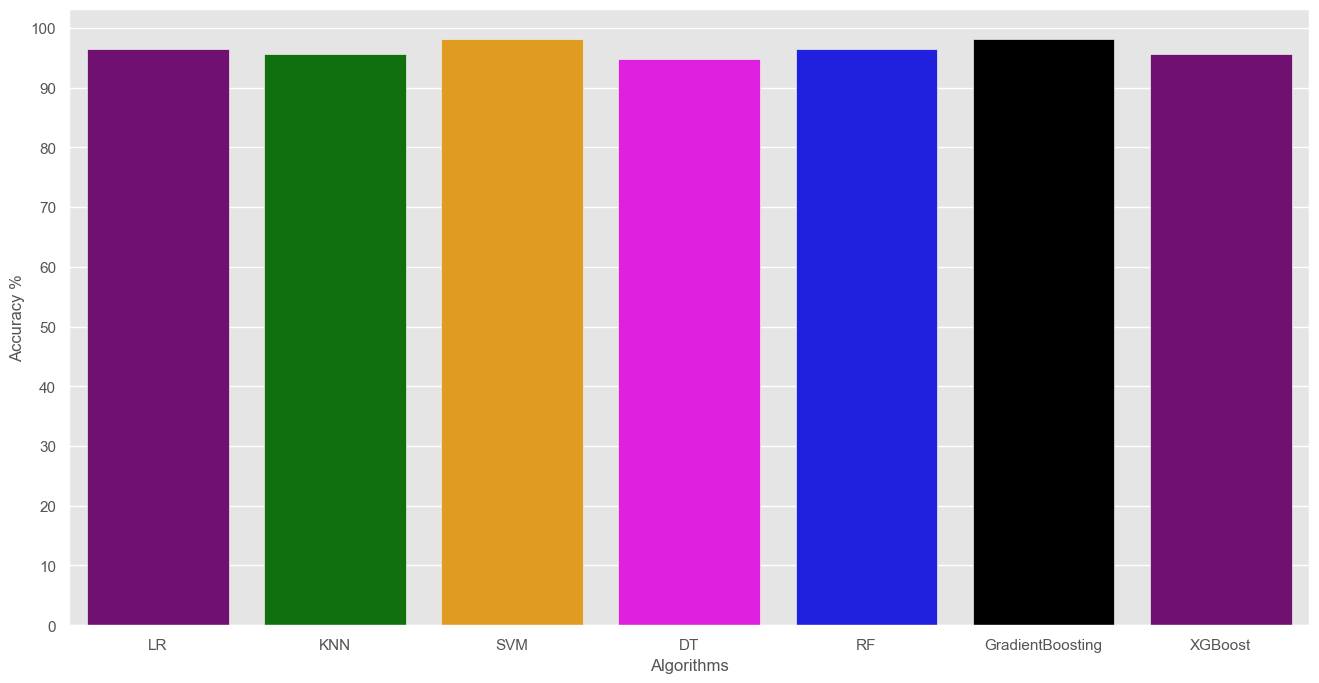

In [279]:
colors = ["purple", "green", "orange", "magenta","blue","black"]

# sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,1200,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors )
plt.show()

- Model 4,6 : SVM, Gradient Boosting has the highest accuracy

In [280]:
import pickle
model = svc
pickle.dump(model, open("../Models/breast_cancer.pkl",'wb'))

In [281]:
type(model)

sklearn.svm._classes.SVC

In [282]:
import numpy as np

# Adjusted sample input for Malignant (1)
malignant_input = np.array([[25.0, 22.5, 150.0, 2000.0, 0.15, 0.3, 0.35, 0.2, 0.4, 0.1,
                             1.5, 100, 0.2, 0.3, 25.0, 1800, 0.25, 0.5, 0.4, 0.2, 0.3, 0.1]])

# Reshape input to match expected format (1 sample, 22 features)
malignant_input = malignant_input.reshape(1, -1)

# Predict
prediction = model.predict(malignant_input)

# Print result
print("Diagnosis:", "Malignant" if prediction[0] == 1 else "Benign")


Diagnosis: Malignant


In [283]:
import numpy as np

# Sample input with 22 features
sample_input = np.array([[15.5, 12.7, 100.4, 800.5, 0.1, 0.2, 0.2, 0.1, 0.2, 0.06,
                          0.5, 50, 0.08, 0.15, 12.3, 700, 0.12, 0.25, 0.22, 0.12, 0.18, 0.07]])

# Reshape input to match expected format (1 sample, 22 features)
sample_input = sample_input.reshape(1, -1)

# Predict
prediction = model.predict(sample_input)

# Print result
print("Diagnosis:", "Malignant" if prediction[0] == 1 else "Benign")



Diagnosis: Malignant


In [284]:
malignant_input = np.array([[20.57, 17.77, 132.9, 1326.0, 0.08474, 0.07864, 0.0869, 0.07017, 0.1812, 0.05667,
                             0.3700, 7.933, 0.02905, 0.04815, 25.38, 2019, 0.1622, 0.2364, 0.2075, 0.141, 0.2218, 0.0782]])

malignant_input = malignant_input.reshape(1, -1)

prediction = model.predict(malignant_input)

print("Diagnosis:", "Malignant" if prediction[0] == 1 else "Benign")


Diagnosis: Malignant


In [285]:
import numpy as np
benign_input = np.array([[ 0.21353817,  0.95665082,  0.23557982, -0.70107653,  1.14955921,
        0.92081553, -0.76469741, -0.58109929, -0.25748419, -0.17628001,
        0.26349531, -0.29747662, -0.89469142,  0.03939852, -0.22460853,
       -0.624651  ,  0.34249851, -0.13313528,  0.43129841, -0.51445501,
       -0.31016118,  0.27528808]])


benign_input = benign_input.reshape(1, -1)

prediction = model.predict(benign_input)

print("Diagnosis:", "Malignant" if prediction[0] == 1 else "Benign")


Diagnosis: Benign
